In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./mywine.csv',sep=';',encoding='ISO-8859-1')    #读取数据

In [4]:
print(data.head())  #简单查看

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## 线性逻辑回归模型

In [5]:
import sklearn 
from sklearn import linear_model
lm = linear_model.LogisticRegression()    #线性逻辑回归模型
features = data.columns.values.tolist()[:-1]   #tlist()函数用于转化为list

In [6]:
data.columns   #数据的列标

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
  data.columns.tolist()  #直接列标变成list就行，不需要values

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [8]:
data.columns.values.tolist()   

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [9]:
data.columns.values.tolist()[:-1]  #去掉最后一个值

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [10]:
x = data.drop('quality',axis = 1)  #按列去掉'quality'
y = data['quality']  #将'quality'这一列作为响应变量

In [11]:
print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [12]:
from sklearn.model_selection import cross_val_score  #交叉验证得分
#logistic 中的scroing参数指定为accuracy
scores = cross_val_score(lm,x,y,cv=5,scoring='accuracy')  #5折交叉验证
print(np.mean(scores))   #返回得分均值

d:\anaconda\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\anaconda\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

0.5734933385579937


d:\anaconda\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


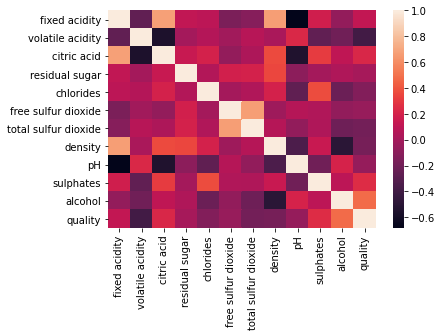

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
data = data.corr()   #data相关系数图
sns.heatmap(data)
plt.show()

In [14]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


这里重新定义data,因为上面的data是data的相关系数矩阵了

In [15]:
data = pd.read_csv('./mywine.csv',sep=';',encoding='ISO-8859-1')

In [16]:
data['quality'].value_counts()   #计数，相当于R中的table()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [27]:
from imblearn.over_sampling import RandomOverSampler
x = data.iloc[:,:-1].values #icloc方法根据位置悬着，即选择所有行，所有列去掉右数第一列
y = data['quality'].values
ros = RandomOverSampler()#构造采样方法  解决数据不平衡问题
x,y = ros.fit_sample(x,y)
print(pd.DataFrame(y)[0].value_counts().sort_index())

3    681
4    681
5    681
6    681
7    681
8    681
Name: 0, dtype: int64


In [29]:
ros.fit_sample(x,y)

(array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
        [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
        [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
        ...,
        [ 7.8 ,  0.57,  0.09, ...,  3.46,  0.74, 12.7 ],
        [10.3 ,  0.32,  0.45, ...,  3.23,  0.82, 12.6 ],
        [ 5.5 ,  0.49,  0.03, ...,  3.5 ,  0.82, 14.  ]]),
 array([5, 5, 5, ..., 8, 8, 8], dtype=int64))

In [18]:
data['quality'].values

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [21]:
pd.DataFrame(y)[0].value_counts().sort_index()     #按照index排序

3    681
4    681
5    681
6    681
7    681
8    681
Name: 0, dtype: int64

In [22]:
from sklearn.model_selection import cross_val_score
#logistic 中的scroing参数指定为accuracy
scores = cross_val_score(lm,x,y,cv=5,scoring='accuracy')
print(np.mean(scores))

d:\anaconda\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\anaconda\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

0.4331791125622095


d:\anaconda\anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 随机森林模型

In [23]:
from sklearn import ensemble
#设置随机深林分类模型
rf = ensemble.RandomForestClassifier(100) #设置100个决策树
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf,x,y,cv=5,scoring='accuracy')
print(np.mean(score))

0.8590283492890981


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=111, stratify=y)  #划分数据集
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=100)) #声明超参数
#preprocessing.StandardScaler() 特征标准化
#RandomForestRegressor(n_estimators=100) 算法是随机森林
hyperparameters = {'randomforestregressor__max_features':['auto','sqrt','log2'], 'randomforestregressor__max_depth':[None,5,3,1]} #优化模型
clf = GridSearchCV(pipeline,hyperparameters,cv=10)  #它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数
#在随机森林模型下选择最优的结果和参数
clf.fit(x_train,y_train) #评估模型及预测
pred = clf.predict(x_test)
print("测试集ACC：")
print(r2_score(y_test, pred))
print("测试集MSE：")
print(mean_squared_error(y_test, pred))

测试集ACC：
0.9727394041387528
测试集MSE：
0.07959828850855746
